In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/Capstone Final 23.07.2023/encoded.csv')

In [ ]:
data

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,matched_word
0,4,12060,5,50296,83662,13,-122.406803,37.757763,0
1,4,593,5,26714,227419,15,-122.479590,37.738186,0
2,4,2162,5,22024,227419,82,-122.444524,37.770370,0
3,6,29566,5,43103,227419,72,-122.426995,37.800873,6
4,6,29566,5,22024,227419,25,-122.437159,37.775975,6
...,...,...,...,...,...,...,...,...,...
373984,6,10473,1,70997,227419,332,-122.397814,37.782137,6
373985,5,50,1,50296,2720,68,-122.417665,37.756291,0
373986,2,4048,1,32974,227419,43,-122.403756,37.716710,6
373987,2,3611,1,70997,8798,12029,-122.403405,37.775421,0


In [ ]:
data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,matched_word
0,4,12060,5,50296,83662,13,-122.406803,37.757763,0
1,4,593,5,26714,227419,15,-122.479590,37.738186,0
2,4,2162,5,22024,227419,82,-122.444524,37.770370,0
3,6,29566,5,43103,227419,72,-122.426995,37.800873,6
4,6,29566,5,22024,227419,25,-122.437159,37.775975,6


In [ ]:
tmp_l = ['Date', 'Category', 'DayOfWeek', 'PdDistrict']

In [ ]:
data.shape

(373989, 9)

In [ ]:
X = data.drop(['Category', 'matched_word'], axis=1)
y = data['Category']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X)

# Transform the data using the scaler
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into features (X) and target variable (y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8450359635284366


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already prepared 'X_scaled' (features) and 'y' (target variable)

# Split the data into training and testing sets (test_size=0.2 means 20% of data used for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees (n_estimators=100)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score with 'macro' averaging
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8450359635284366
Precision: 0.7000733953412726
Recall: 0.6318596589938229
F1-score: 0.6596674503020321


In [ ]:
#Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
n_estimators = [100, 150, 200, 300] # number of trees in the random forest
max_features = ['log2', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 25, cv = 3, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train,  y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=35, verbose=2)

In [ ]:
rf_random.score(X_test, y_test)

In [ ]:
best = rf_random.best_estimator_

In [ ]:
y_pred = best.predict(X_test)

<Axes: >

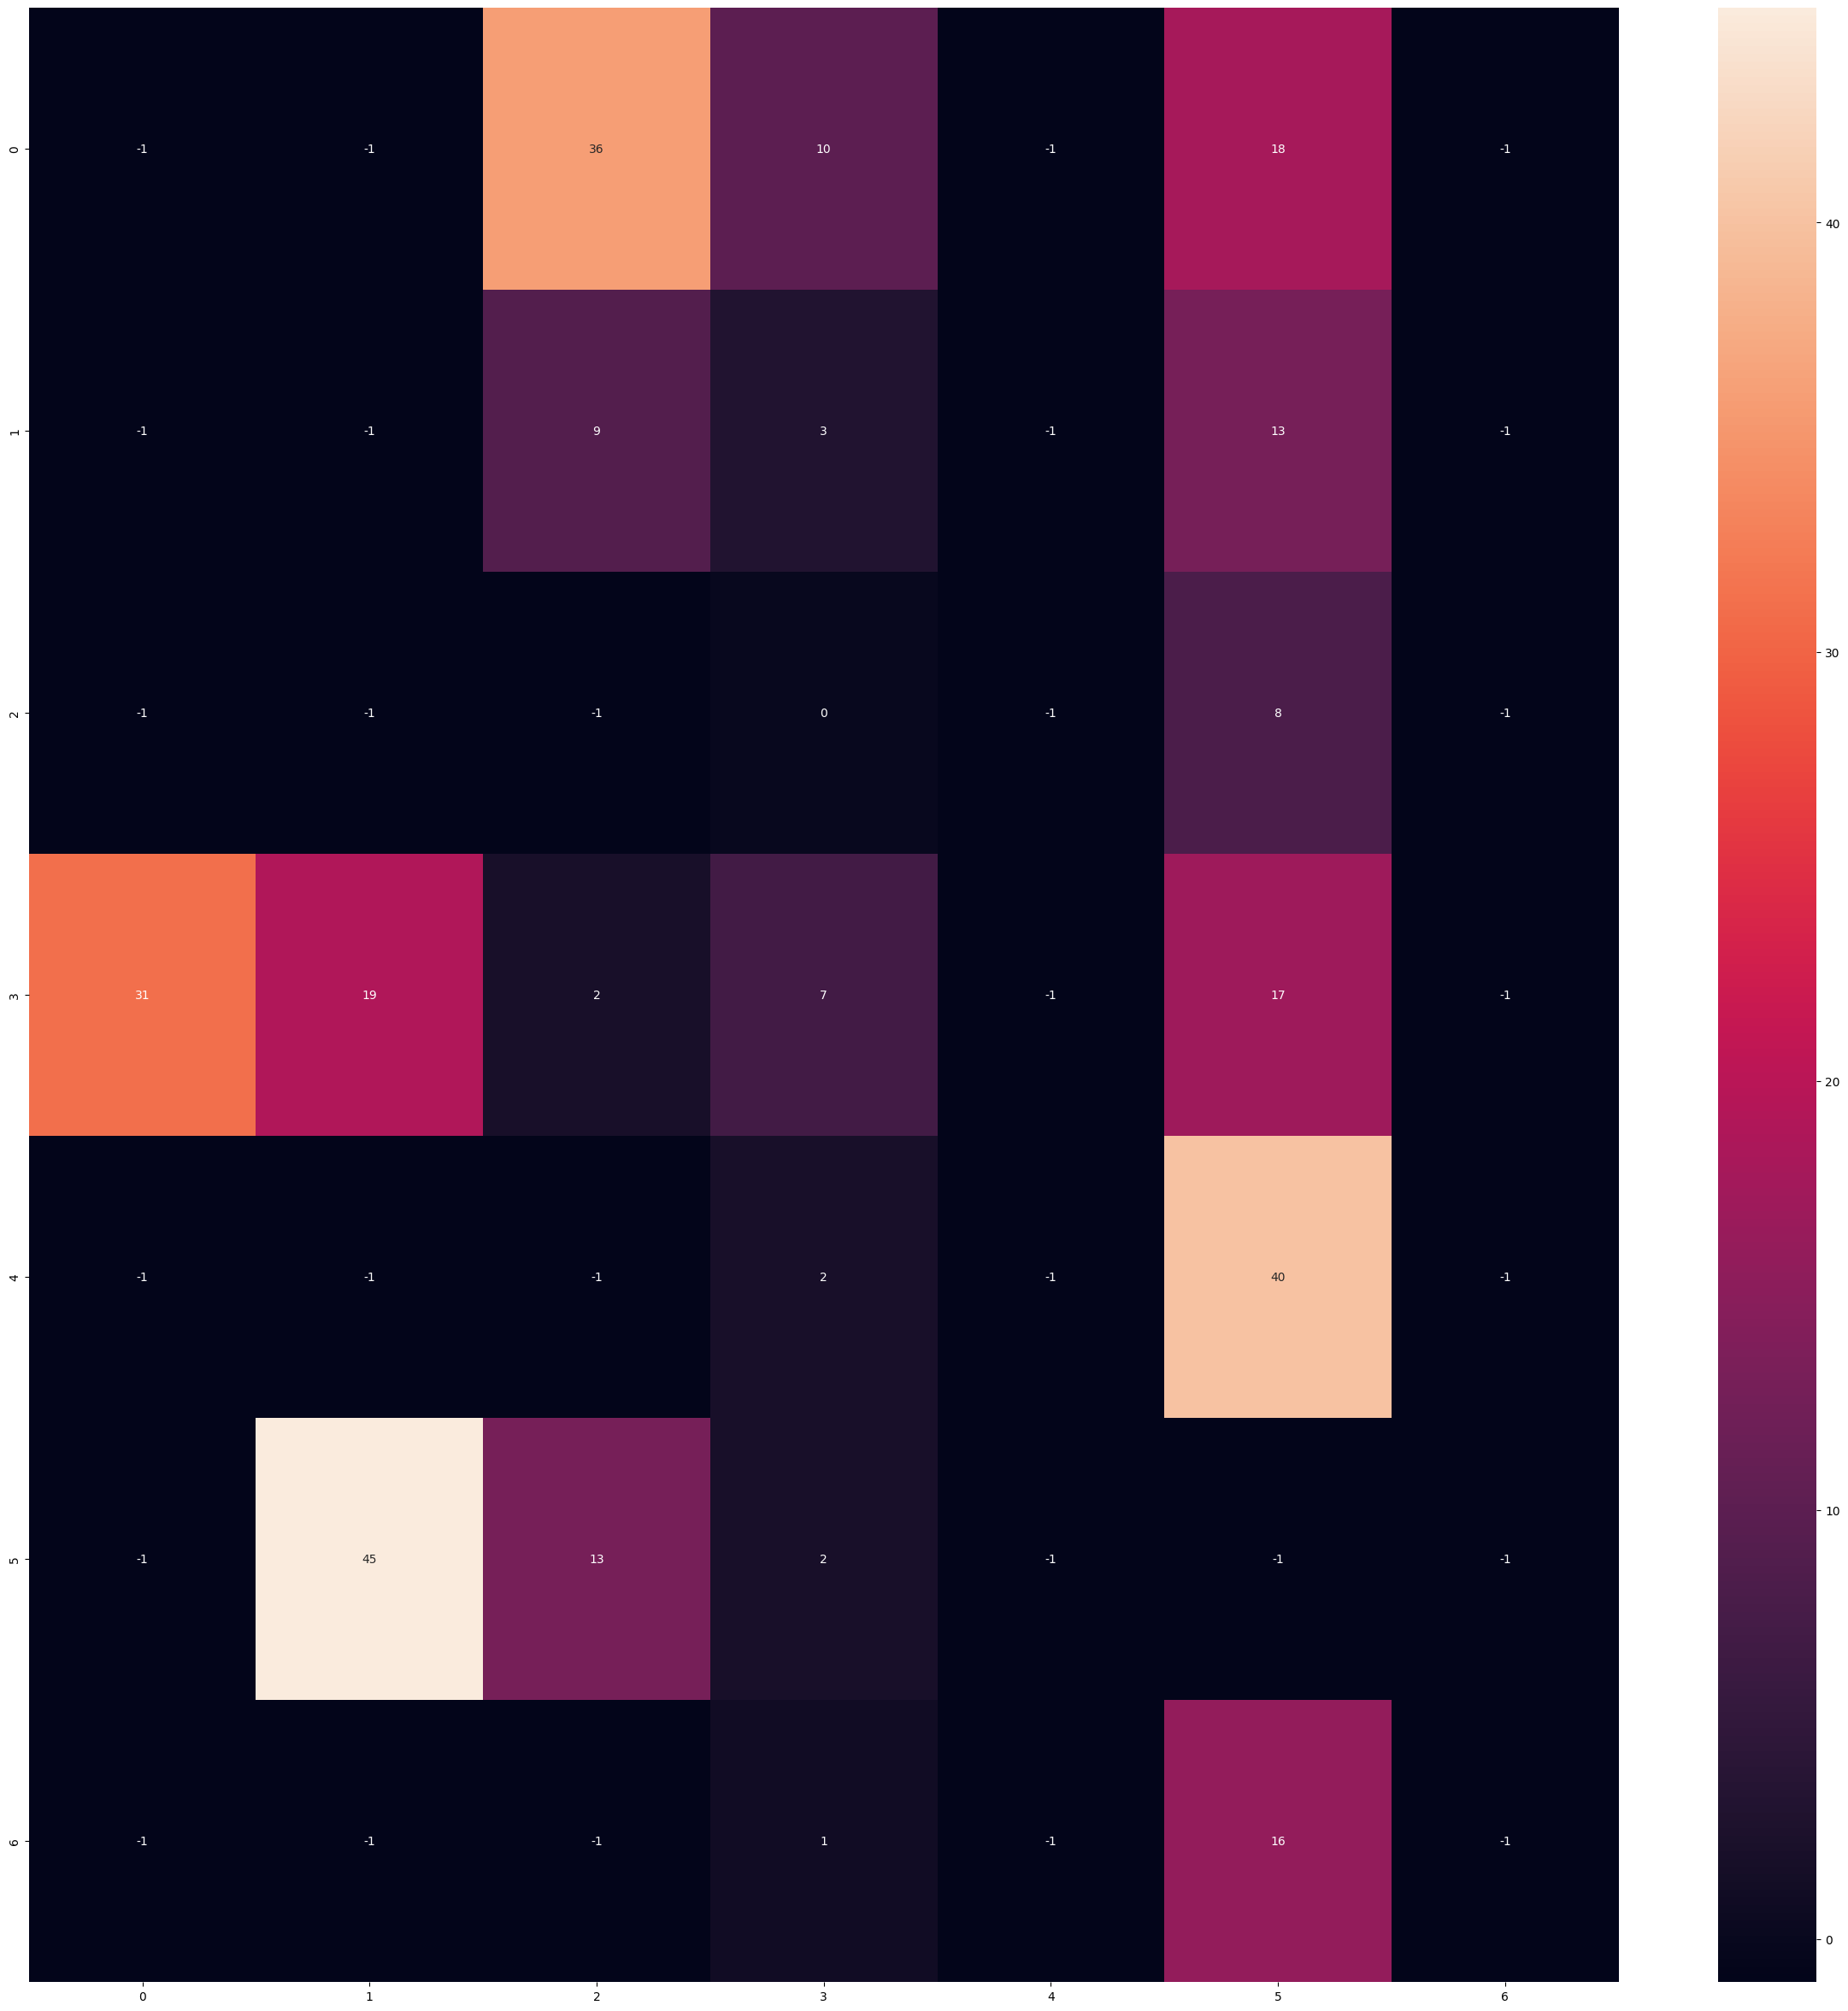

In [ ]:
#predicted_classes = np.argmax(predict_x, axis=1)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
cm2 = cm.copy()
cm2[cm2 > 50] = -1
plt.figure(figsize = (30,30))
sn.heatmap(cm2, annot=True)

In [ ]:
X_train.shape

(302931, 7)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5070590122730554


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
